# PLM description generation

## Preparing data

In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openai import OpenAI

In [ ]:
pet_dataset = pd.read_csv('/content/drive/MyDrive/Thesis/doc2vec-dataset.csv')

<ipython-input-36-52a918e32c13>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pet_dataset = pd.read_csv('/content/drive/MyDrive/Thesis/doc2vec-dataset.csv')


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Thesis/X_test.csv')
labels = pd.read_csv('/content/drive/MyDrive/Thesis/y_test.csv')

In [ ]:
# Assuming 'your_join_column' is the column you want to merge on, and it exists in both DataFrames:
data2 = data.merge(pet_dataset, on=['Unnamed: 0','pet','age','gender','color', 'size', 'photos', 'vector_0', 'vector_1', 'vector_2', 'vector_3', 'vector_4', 'vector_5', 'vector_6', 'vector_7', 'vector_8', 'vector_9', 'vector_10', 'vector_11', 'vector_12', 'vector_13', 'vector_14', 'vector_15', 'vector_16', 'vector_17',
 'vector_18','vector_19', 'vector_20', 'vector_21', 'vector_22', 'vector_23', 'vector_24', 'vector_25', 'vector_26', 'vector_27', 'vector_28', 'vector_29', 'vector_30', 'vector_31', 'vector_32', 'vector_33', 'vector_34', 'vector_35', 'vector_36', 'vector_37','vector_38','vector_39', 'vector_40',
 'vector_41', 'vector_42', 'vector_43', 'vector_44', 'vector_45','vector_46', 'vector_47', 'vector_48', 'vector_49', 'vector_50', 'vector_51', 'vector_52', 'vector_53', 'vector_54', 'vector_55', 'vector_56', 'vector_57', 'vector_58', 'vector_59', 'vector_60', 'vector_61', 'vector_62', 'vector_63',
 'vector_64', 'vector_65', 'vector_66', 'vector_67', 'vector_68', 'vector_69','vector_70','vector_71', 'vector_72', 'vector_73', 'vector_74', 'vector_75', 'vector_76', 'vector_77', 'vector_78', 'vector_79', 'vector_80', 'vector_81', 'vector_82', 'vector_83', 'vector_84', 'vector_85',
 'vector_86', 'vector_87', 'vector_88', 'vector_89', 'vector_90', 'vector_91', 'vector_92', 'vector_93', 'vector_94', 'vector_95','vector_96', 'vector_97', 'vector_98', 'vector_99'], how='left')
data2

,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,vector_2,...,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,pid,description,adopted
0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,0.097171,...,0.253944,-0.134316,0.352780,0.076132,0.231228,-0.015402,0.585188,40847443,available adoption brawny male maltipoo 8 year...,Adopted
1,163205,Dog,Young,Male,Unknown,Medium,3,-0.063906,-0.120907,-0.150912,...,0.135924,0.012253,0.006966,0.047521,0.012037,-0.279150,0.272248,42274229,hi im finnick im shy sensitive pup looking cal...,Unadopted
2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,0.095112,...,0.141436,0.209824,0.061069,0.200590,0.076650,-0.063295,0.470014,42591488,font size3 font color669900bi available adopti...,Adopted
3,132421,Dog,Adult,Male,Other,Small,1,0.072339,-0.030328,0.062557,...,0.035745,0.153102,-0.006564,0.100330,0.073430,-0.020734,0.133471,40978479,wag rescue welcome sweet felix tiny chi 18 mo ...,Unadopted
4,140095,Dog,Adult,Male,Gray,Large,6,-0.073295,-0.003285,-0.058319,...,0.178879,-0.008426,-0.043694,0.184267,0.098949,-0.047755,0.270142,40815035,handsome vadar rescued baldwin park animal she...,Unadopted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33173,194782,Cat,Adult,Male,Black_White,Medium,1,0.051942,0.118932,0.146108,...,-0.196980,-0.023798,-0.204447,-0.211816,0.056710,-0.080183,0.379047,41311670,meet max tux newark max friendly young houseca...,Unadopted
33174,32071,Cat,Baby,Female,Black_White,Medium,5,0.059260,0.127251,0.188594,...,0.439655,0.322086,0.126867,0.344908,-0.001791,-0.069777,0.139832,42472841,lovely ladythis delicious little girl boast lu...,Adopted
33175,85058,Dog,Adult,Female,Other,Small,3,0.021902,-0.029255,0.050348,...,0.062713,0.022912,-0.032528,0.065442,0.042717,-0.110760,0.263868,43012485,kiki cute sweet female 6 yr old female beagle ...,Adopted
33176,64233,Dog,Baby,Female,Unknown,Medium,2,0.013704,-0.020382,-0.012527,...,0.129991,0.078074,0.067940,0.062951,0.048482,-0.071546,0.215619,41484430,4 month old sweetheart spayed microchipped rec...,Adopted


In [ ]:
full_des = pd.read_csv('/content/drive/MyDrive/Thesis/petdata_wo_sample.csv')
full_des

<ipython-input-33-c729bc1a9962>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  full_des = pd.read_csv('/content/drive/MyDrive/Thesis/petdata_wo_sample.csv')


,Unnamed: 0,pet,age,gender,color,size,description,pid,photos,adopted,description_words,word_count
0,0,Cat,Adult,Male,Brown_Chocolate,Small,For further information please visit our websi...,41085682,1,Adopted,"['For', 'further', 'information', 'please', 'v...",643
1,1,Cat,Young,Male,Unknown,Medium,Bart is a sweet and joyful boy who loves to be...,42779556,2,Adopted,"['Bart', 'is', 'a', 'sweet', 'and', 'joyful', ...",1975
2,2,Dog,Adult,Female,Other,Medium,Wake up every morning to someone who truly L?V...,40922487,5,Adopted,"['Wake', 'up', 'every', 'morning', 'to', 'some...",1963
3,3,Dog,Baby,Female,Other,Large,Nala is a 9 month old female mix. She is guess...,41787973,6,Adopted,"['Nala', 'is', 'a', '9', 'month', 'old', 'fema...",1558
4,4,Cat,Baby,Female,Other,Medium,Yuki is a social butterfly with people and wit...,42801248,1,Adopted,"['Yuki', 'is', 'a', 'social', 'butterfly', 'wi...",809
...,...,...,...,...,...,...,...,...,...,...,...,...
221176,221326,Dog,Adult,Male,Unknown,Medium,"Woof! It's me Moose, a 2 year old Border Colli...",42312550,3,Unadopted,"['Woof', '!', 'It', ""'s"", 'me', 'Moose', ',', ...",3610
221177,221327,Dog,Adult,Male,Unknown,Medium,"Hi there! My name is Zagnut, but my foster mom...",41380802,5,Unadopted,"['Hi', 'there', '!', 'My', 'name', 'is', 'Zagn...",3628
221178,221328,Cat,Young,Female,Unknown,Medium,Please contact Tia (tkocianic@yahoo.com) for m...,39027997,3,Unadopted,"['Please', 'contact', 'Tia', '(', 'tkocianic',...",3621
221179,221329,Dog,Adult,Female,Unknown,Medium,Hello world! My name is Tassels and I am excit...,42083623,3,Unadopted,"['Hello', 'world', '!', 'My', 'name', 'is', 'T...",3596


In [ ]:
full_des = full_des.drop(['Unnamed: 0', 'pet', 'age', 'gender', 'color', 'size', 'photos', 'adopted', 'description_words', 'word_count'], axis=1)
full_des

,description,pid
0,For further information please visit our websi...,41085682
1,Bart is a sweet and joyful boy who loves to be...,42779556
2,Wake up every morning to someone who truly L?V...,40922487
3,Nala is a 9 month old female mix. She is guess...,41787973
4,Yuki is a social butterfly with people and wit...,42801248
...,...,...
221176,"Woof! It's me Moose, a 2 year old Border Colli...",42312550
221177,"Hi there! My name is Zagnut, but my foster mom...",41380802
221178,Please contact Tia (tkocianic@yahoo.com) for m...,39027997
221179,Hello world! My name is Tassels and I am excit...,42083623


In [ ]:
full_des['description'].isna().sum()


5

In [ ]:
full_des.drop_duplicates(inplace=True, subset='pid')
full_des

,description,pid
0,For further information please visit our websi...,41085682
1,Bart is a sweet and joyful boy who loves to be...,42779556
2,Wake up every morning to someone who truly L?V...,40922487
3,Nala is a 9 month old female mix. She is guess...,41787973
4,Yuki is a social butterfly with people and wit...,42801248
...,...,...
221176,"Woof! It's me Moose, a 2 year old Border Colli...",42312550
221177,"Hi there! My name is Zagnut, but my foster mom...",41380802
221178,Please contact Tia (tkocianic@yahoo.com) for m...,39027997
221179,Hello world! My name is Tassels and I am excit...,42083623


In [ ]:
final_data = data2.merge(full_des, on='pid', how = 'left')
final_data = final_data.drop('description_x', axis=1)

In [ ]:
final_data = final_data.dropna(subset=['description_y'])


In [ ]:
final_data['description_y'].isna().sum()

0

In [ ]:
 final_data

,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,vector_2,...,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y
0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,0.097171,...,0.253944,-0.134316,0.352780,0.076132,0.231228,-0.015402,0.585188,40847443,Adopted,Available for adoption now! Brawny is a male ...
1,163205,Dog,Young,Male,Unknown,Medium,3,-0.063906,-0.120907,-0.150912,...,0.135924,0.012253,0.006966,0.047521,0.012037,-0.279150,0.272248,42274229,Unadopted,"Hi there, I'm Finnick! I'm a shy, sensitive pu..."
2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,0.095112,...,0.141436,0.209824,0.061069,0.200590,0.076650,-0.063295,0.470014,42591488,Adopted,"<FONT SIZE=3> <FONT COLOR=""669900""><b>I am ava..."
3,132421,Dog,Adult,Male,Other,Small,1,0.072339,-0.030328,0.062557,...,0.035745,0.153102,-0.006564,0.100330,0.073430,-0.020734,0.133471,40978479,Unadopted,WAGS RESCUE WELCOMES SWEET FELIX... This tiny ...
4,140095,Dog,Adult,Male,Gray,Large,6,-0.073295,-0.003285,-0.058319,...,0.178879,-0.008426,-0.043694,0.184267,0.098949,-0.047755,0.270142,40815035,Unadopted,Handsome Vadar was rescued from Baldwin Park A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33173,194782,Cat,Adult,Male,Black_White,Medium,1,0.051942,0.118932,0.146108,...,-0.196980,-0.023798,-0.204447,-0.211816,0.056710,-0.080183,0.379047,41311670,Unadopted,Meet Max the Tux from Newark! Max is a friendl...
33174,32071,Cat,Baby,Female,Black_White,Medium,5,0.059260,0.127251,0.188594,...,0.439655,0.322086,0.126867,0.344908,-0.001791,-0.069777,0.139832,42472841,Adopted,Lovely Lady...this delicious little girl. She...
33175,85058,Dog,Adult,Female,Other,Small,3,0.021902,-0.029255,0.050348,...,0.062713,0.022912,-0.032528,0.065442,0.042717,-0.110760,0.263868,43012485,Adopted,KiKi is a very cute and sweet female 6 yr old ...
33176,64233,Dog,Baby,Female,Unknown,Medium,2,0.013704,-0.020382,-0.012527,...,0.129991,0.078074,0.067940,0.062951,0.048482,-0.071546,0.215619,41484430,Adopted,4 months old. This sweetheart has been spayed...


In [ ]:
final_data.to_csv('/content/drive/MyDrive/Thesis/final_data.csv')

In [ ]:
final_data = pd.read_csv('/content/drive/MyDrive/Thesis/final_data.csv')

## Taking a sample

In [ ]:
subs = final_data[:10]
subs['description_y'] = subs['description_y'].astype(str)
subs

<ipython-input-9-a846b837a539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['description_y'] = subs['description_y'].astype(str)


,Unnamed: 0.1,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,...,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y
0,0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,...,0.253944,-0.134316,0.352780,0.076132,0.231228,-0.015402,0.585188,40847443,Adopted,Available for adoption now! Brawny is a male ...
1,1,163205,Dog,Young,Male,Unknown,Medium,3,-0.063906,-0.120907,...,0.135924,0.012253,0.006966,0.047521,0.012037,-0.279150,0.272248,42274229,Unadopted,"Hi there, I'm Finnick! I'm a shy, sensitive pu..."
2,2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,...,0.141436,0.209824,0.061069,0.200590,0.076650,-0.063295,0.470014,42591488,Adopted,"<FONT SIZE=3> <FONT COLOR=""669900""><b>I am ava..."
3,3,132421,Dog,Adult,Male,Other,Small,1,0.072339,-0.030328,...,0.035745,0.153102,-0.006564,0.100330,0.073430,-0.020734,0.133471,40978479,Unadopted,WAGS RESCUE WELCOMES SWEET FELIX... This tiny ...
4,4,140095,Dog,Adult,Male,Gray,Large,6,-0.073295,-0.003285,...,0.178879,-0.008426,-0.043694,0.184267,0.098949,-0.047755,0.270142,40815035,Unadopted,Handsome Vadar was rescued from Baldwin Park A...
5,5,161831,Dog,Adult,Male,White_Cream,Large,4,0.285485,-0.152416,...,-0.022909,0.081633,-0.210029,-0.022244,0.034648,0.123340,0.229430,37670786,Unadopted,Beauregard--Beau for short--jcelebrated his fi...
6,6,139593,Cat,Adult,Female,Other,Small,2,-0.002169,-0.157382,...,0.059715,-0.020844,-0.013365,-0.006469,0.142058,-0.116701,0.268045,41883267,Unadopted,"Clara is gorgeous, first of all. Second, she i..."
7,7,212113,Dog,Senior,Male,White_Cream,Small,1,-0.160081,0.164551,...,0.185460,0.088422,-0.001116,0.222334,0.073662,-0.181538,0.581450,39859784,Unadopted,Ollie is an adorable little older Maltese (mix...
8,8,138063,Dog,Adult,Male,Other,Small,2,0.016276,0.030730,...,0.031675,-0.055454,0.040882,0.053840,-0.051222,-0.120304,0.225802,39074467,Unadopted,Pepe is currently about 4 years old. He is an ...
9,9,108429,Rabbit,Adult,Male,Unknown,Medium,3,0.163335,-0.159791,...,0.139834,0.290743,0.103388,0.113877,-0.089151,0.103122,0.350895,40886201,Adopted,This sweet guy formerly named BunBun came to M...


## Analyzing examples

In [ ]:
examples = pd.read_csv('/content/drive/MyDrive/Thesis/balanced_plm_sample.csv')

In [ ]:
examples

,Unnamed: 0,pet,age,gender,color,size,description,pid,photos,adopted,description_words,word_count
0,90879,Cat,Baby,Male,Black,Medium,Elton is a 9 month old domestic long hair and ...,39899031,2,Adopted,"['Elton', 'is', 'a', '9', 'month', 'old', 'dom...",1108
1,32155,Cat,Young,Female,Black_White,Medium,Paloma is a pretty black and white girl who is...,42809638,1,Adopted,"['Paloma', 'is', 'a', 'pretty', 'black', 'and'...",483
2,57091,Cat,Baby,Male,Other,Medium,"Merry and Pippin are very sweet kittens, 8 we...",41631568,3,Adopted,"['Merry', 'and', 'Pippin', 'are', 'very', 'swe...",599
3,49393,Cat,Adult,Female,Black,Medium,"Hi, I'm Yooper! I'm a sweet DMH girl. I'm spay...",43203158,2,Adopted,"['Hi', ',', 'I', ""'m"", 'Yooper', '!', 'I', ""'m...",273
4,4266,Cat,Baby,Male,Other,Medium,Meet Otis - a handsome playful boy! He's ready...,42069115,1,Adopted,"['Meet', 'Otis', '-', 'a', 'handsome', 'playfu...",501
...,...,...,...,...,...,...,...,...,...,...,...,...
145,219451,Rabbit,Senior,Female,Unknown,Large,Please fill out an adoption application and se...,39915165,1,Unadopted,"['Please', 'fill', 'out', 'an', 'adoption', 'a...",3451
146,161561,Rabbit,Senior,Female,Unknown,Medium,Harper was born in 2011 and came from a hoardi...,41242446,1,Unadopted,"['Harper', 'was', 'born', 'in', '2011', 'and',...",912
147,203614,Rabbit,Adult,Male,Other,Medium,Chino is a gentle and animated bunny. He is go...,31482453,3,Unadopted,"['Chino', 'is', 'a', 'gentle', 'and', 'animate...",1979
148,161520,Rabbit,Adult,Male,Unknown,Medium,"Zipper has quite a following a the Hollow, you...",40614882,2,Unadopted,"['Zipper', 'has', 'quite', 'a', 'following', '...",921


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

def count_sentences(text):
    sentences = sent_tokenize(text)
    return len(sentences)

examples['sentence_count'] = examples['description'].apply(count_sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
examples

,Unnamed: 0,pet,age,gender,color,size,description,pid,photos,adopted,description_words,word_count,sentence_count
0,90879,Cat,Baby,Male,Black,Medium,Elton is a 9 month old domestic long hair and ...,39899031,2,Adopted,"['Elton', 'is', 'a', '9', 'month', 'old', 'dom...",1108,11
1,32155,Cat,Young,Female,Black_White,Medium,Paloma is a pretty black and white girl who is...,42809638,1,Adopted,"['Paloma', 'is', 'a', 'pretty', 'black', 'and'...",483,4
2,57091,Cat,Baby,Male,Other,Medium,"Merry and Pippin are very sweet kittens, 8 we...",41631568,3,Adopted,"['Merry', 'and', 'Pippin', 'are', 'very', 'swe...",599,2
3,49393,Cat,Adult,Female,Black,Medium,"Hi, I'm Yooper! I'm a sweet DMH girl. I'm spay...",43203158,2,Adopted,"['Hi', ',', 'I', ""'m"", 'Yooper', '!', 'I', ""'m...",273,4
4,4266,Cat,Baby,Male,Other,Medium,Meet Otis - a handsome playful boy! He's ready...,42069115,1,Adopted,"['Meet', 'Otis', '-', 'a', 'handsome', 'playfu...",501,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,219451,Rabbit,Senior,Female,Unknown,Large,Please fill out an adoption application and se...,39915165,1,Unadopted,"['Please', 'fill', 'out', 'an', 'adoption', 'a...",3451,21
146,161561,Rabbit,Senior,Female,Unknown,Medium,Harper was born in 2011 and came from a hoardi...,41242446,1,Unadopted,"['Harper', 'was', 'born', 'in', '2011', 'and',...",912,8
147,203614,Rabbit,Adult,Male,Other,Medium,Chino is a gentle and animated bunny. He is go...,31482453,3,Unadopted,"['Chino', 'is', 'a', 'gentle', 'and', 'animate...",1979,19
148,161520,Rabbit,Adult,Male,Unknown,Medium,"Zipper has quite a following a the Hollow, you...",40614882,2,Unadopted,"['Zipper', 'has', 'quite', 'a', 'following', '...",921,9


In [ ]:
adopted_examples = examples[examples['adopted'] == 'Adopted']
unadopted_examples = examples[examples['adopted'] == 'Unadopted']

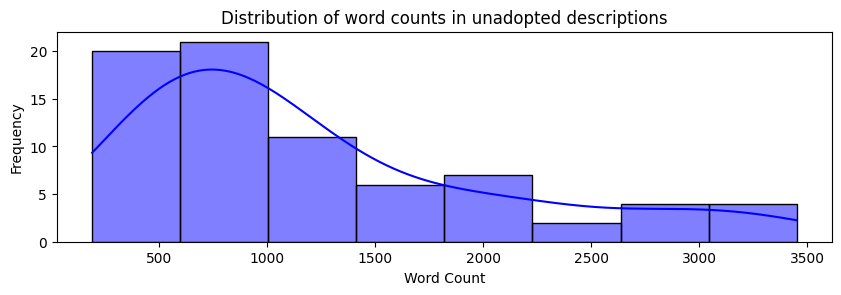

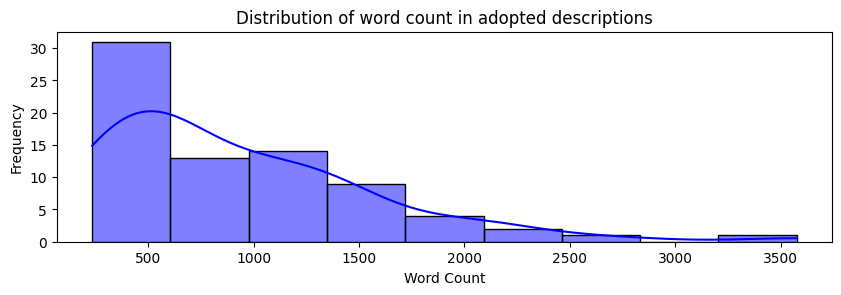

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
sns.histplot(unadopted_examples['word_count'], kde=True, color='blue')  # Histogram with density line
plt.title('Distribution of word counts in unadopted descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
sns.histplot(adopted_examples['word_count'], kde=True, color='blue')  # Histogram with density line
plt.title('Distribution of word count in adopted descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

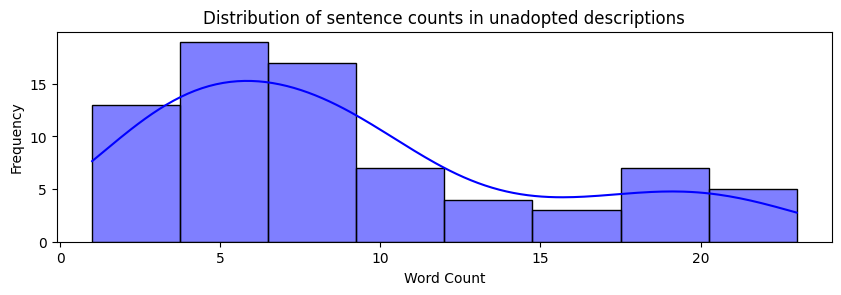

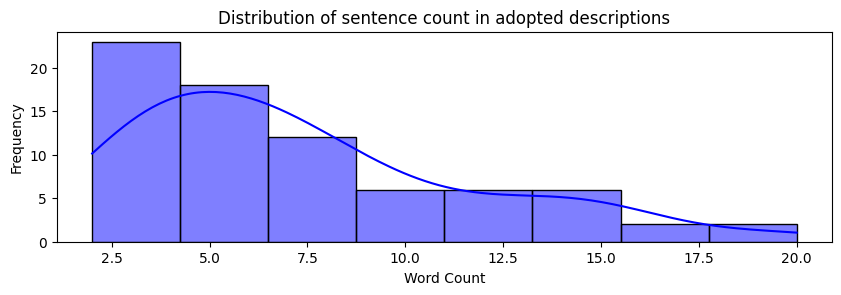

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
sns.histplot(unadopted_examples['sentence_count'], kde=True, color='blue')  # Histogram with density line
plt.title('Distribution of sentence counts in unadopted descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
sns.histplot(adopted_examples['sentence_count'], kde=True, color='blue')  # Histogram with density line
plt.title('Distribution of sentence count in adopted descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

## Cold start zero-shot

In [ ]:
#cold start zero-shot

def czs_rewrite_description(row):
    client = OpenAI(api_key="sk-proj-6dmOD6AaUjvPawx9Tu4GT3BlbkFJMSIImLgTjsMetHsstnCn")

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {
                    "role": "system",
                    "content": "You will write descriptions for shelter animals that haven't been adopted yet. Try to help the animals to get adopted, but remain truthful. Only include characteristics that are already mentioned in the given data. Focus on the positive traits of each pet, write analytical and write the description in third person. Do not write more than 5 sentences. The input data will be given in this format: animal type: <>, age: <>,	gender: <>,	color: <>, size: <>. "
                },
                {
                    "role": "user",
                    "content": f"animal type: {row['pet']} age: {row['age']},	gender: {row['gender']},	color: {row['color']}, size: {row['size']}."
                }
            ],
            temperature=1,
            max_tokens=213,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0
        )

        return response.choices[0].message.content
    except Exception as e:
        print(f"Failed to process description: {pet} due to {e}")
        return None

In [ ]:
subs['czs_rewritten_description'] = subs.apply(czs_rewrite_description, axis=1)

<ipython-input-57-9d4600884998>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['czs_rewritten_description'] = subs.apply(czs_rewrite_description, axis=1)


## Cold start one-shot

In [ ]:
#cold start one-shot

def cos_rewrite_description(row):
    client = OpenAI(api_key="sk-proj-6dmOD6AaUjvPawx9Tu4GT3BlbkFJMSIImLgTjsMetHsstnCn")

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {
                    "role": "system",
                    "content": "You will write descriptions for shelter animals that haven't been adopted yet. Try to help the animals to get adopted, but remain truthful. Only include characteristics that are already mentioned in the given data. Focus on the positive traits of each pet, write analytical and write the description in third person. Do not write more than 5 sentences. The input data will be given in this format: animal type: <>, age: <>,	gender: <>,	color: <>, size: <>. For each type of animal, one example description is provided. "
                },
                {
                    "role": "assistant",
                    "content": "cat example: Paloma is a pretty black and white girl who is a little shy initially but warms up with love and attention.  She does fine with other cats but would also do fine on her own.  She would do best in a home without very young children to help her settle in.  She can be seen at Princeton's Meow. "
                },
                 {
                    "role": "assistant",
                    "content": "dog example: Meet Bella. This sweet girl is looking for a new home as her people are getting divorced. Bella was adopted through us just over two years ago. She is about 2.5 years old.   Bella is super social, crate trained, house broken. She has lived with kids and other dogs. We are pretty sure she is Chug. She has a physical and her vaccines updated on 10/15 and is ready for her new home. We don't know how she is with cats, but she is being fostered with dogs large and small. The foster family is smitten!   Each dog goes home with a goody bag including toys, chews, Kong, and more. You will receive all medical records, microchip transfer form and other paperwork at the time of adoption"
                },
                {
                    "role": "assistant",
                    "content": "rabbit example: Zoey was found in Bethlehem, absolutely neglected. She was covered in ticks and in rough shape. Now that she is all fixed up and spayed, she's looking for her forever home! Zoey is a goofy girl who will make you giggle with her antics. She prefers her feet to be on the ground, like most rabbits do. She will snuggle on her own terms and can be an absolute love bug once she trusts you. She's a hyper girl and will need plenty of time to run outside of her enclosure.  Zoey, like all of our rabbits, is looking for her forever indoor home. If you would like to add Zoey to your family, please send us an email."
                },
                {
                    "role": "user",
                    "content": f"animal type: {row['pet']} age: {row['age']},	gender: {row['gender']},	color: {row['color']}, size: {row['size']}."
                }
            ],
            temperature=0.2,
            max_tokens=213,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0
        )

        return response.choices[0].message.content
    except Exception as e:
        print(f"Failed to process description: {pet} due to {e}")
        return None

In [ ]:
subs['cos_rewritten_description'] = subs.apply(cos_rewrite_description, axis=1)

<ipython-input-59-b06a68eaf541>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['cos_rewritten_description'] = subs.apply(cos_rewrite_description, axis=1)


## Rewriting zero-shot

In [ ]:
#rewriting zero-shot

def zs_rewrite_description(description):
    client = OpenAI(api_key="sk-proj-6dmOD6AaUjvPawx9Tu4GT3BlbkFJMSIImLgTjsMetHsstnCn")

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {
                    "role": "system",
                    "content": "You will re-write descriptions for shelter animals that haven't been adopted yet. Improve the descriptions to help the animals get adopted, but remain truthful. Only include characteristics that are already mentioned in the original description. Write analytical, and write the description in third person. Do not write more than 5 sentences."
                },
                {
                    "role": "user",
                    "content": description
                }
            ],
            temperature=1,
            max_tokens=213,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0
        )

        return response.choices[0].message.content
    except Exception as e:
        print(f"Failed to process description: {description} due to {e}")
        return None


In [ ]:
subs['zs_rewritten_description'] = subs['description_y'].apply(rewrite_description)


<ipython-input-55-fdc801392a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['zs_rewritten_description'] = subs['description_y'].apply(rewrite_description)


In [ ]:
data.to_csv('/content/drive/MyDrive/Thesis/updated_descriptions.csv', index=False)


## Rewriting one-shot

In [ ]:
adopted_examples.iloc[20]['description']

'Jet is a male around 5 months old.  One of a litter of six.  Neutered, feline distemper and rabies vaccines  Wormed  Feline Leukemia test was negative  Very loving.    Foster has noticed that Jet will snuggle her way close to the older cats when they are relaxed.  We would suggest that he would be great with a family who is looking for a companion for their older cat.  Fostered at a home with 3 children, dog, several adult cats, rabbit, ducks, chickens.  This is not an outside cat.  Only those who will keep Jet inside need inquire.  70.00 adoption fee..  A complete vetting history with corresponding paperwork will be given to adopting family.'

In [ ]:
#rewriting one-shot

def os_rewrite_description(description):
    client = OpenAI(api_key="sk-proj-6dmOD6AaUjvPawx9Tu4GT3BlbkFJMSIImLgTjsMetHsstnCn")

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {
                    "role": "system",
                    "content": "You will re-write descriptions for shelter animals that haven't been adopted yet. Improve the descriptions to help the animals get adopted, but remain truthful. Only include characteristics that are already mentioned in the original description. Write analytical, and write the description in third person. Do not write more than 5 sentences. For each type of animal, one example description is provided."
                },
                {
                    "role": "assistant",
                    "content": "cat example: Paloma is a pretty black and white girl who is a little shy initially but warms up with love and attention.  She does fine with other cats but would also do fine on her own.  She would do best in a home without very young children to help her settle in.  She can be seen at Princeton's Meow. "
                },
                 {
                    "role": "assistant",
                    "content": "dog example: Meet Bella. This sweet girl is looking for a new home as her people are getting divorced. Bella was adopted through us just over two years ago. She is about 2.5 years old.   Bella is super social, crate trained, house broken. She has lived with kids and other dogs. We are pretty sure she is Chug. She has a physical and her vaccines updated on 10/15 and is ready for her new home. We don't know how she is with cats, but she is being fostered with dogs large and small. The foster family is smitten!   Each dog goes home with a goody bag including toys, chews, Kong, and more. You will receive all medical records, microchip transfer form and other paperwork at the time of adoption"
                },
                {
                    "role": "assistant",
                    "content": "rabbit example: Zoey was found in Bethlehem, absolutely neglected. She was covered in ticks and in rough shape. Now that she is all fixed up and spayed, she's looking for her forever home! Zoey is a goofy girl who will make you giggle with her antics. She prefers her feet to be on the ground, like most rabbits do. She will snuggle on her own terms and can be an absolute love bug once she trusts you. She's a hyper girl and will need plenty of time to run outside of her enclosure.  Zoey, like all of our rabbits, is looking for her forever indoor home. If you would like to add Zoey to your family, please send us an email."
                },
                {
                    "role": "user",
                    "content": description}
            ],
            temperature=1,
            max_tokens=213,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0
        )

        return response.choices[0].message.content
    except Exception as e:
        print(f"Failed to process description: {description} due to {e}")
        return None

In [ ]:
subs['os_rewritten_description'] = subs['description_y'].apply(os_rewrite_description)

<ipython-input-53-5aa681e0ffcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['os_rewritten_description'] = subs['description_y'].apply(os_rewrite_description)


## Rewriting few-shot

In [ ]:
#rewriting few-shot

def fs_rewrite_description(description):
    client = OpenAI(api_key="sk-proj-6dmOD6AaUjvPawx9Tu4GT3BlbkFJMSIImLgTjsMetHsstnCn")

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {
                    "role": "system",
                    "content": "You will re-write descriptions for shelter animals that haven't been adopted yet. Improve the descriptions to help the animals get adopted, but remain truthful. Only include characteristics that are already mentioned in the original description. Write analytical, and write the description in third person. Do not write more than 5 sentences. For each type of animal, a few example descriptions are provided."
                },
                {
                    "role": "assistant",
                    "content": "cat example 1: Paloma is a pretty black and white girl who is a little shy initially but warms up with love and attention.  She does fine with other cats but would also do fine on her own.  She would do best in a home without very young children to help her settle in.  She can be seen at Princeton's Meow. "
                },
                {
                    "role": "assistant",
                    "content": "cat example 2: Meet Clarke - a tiny and terrifically sweet little girl. She's full of all the wonderful things that suggests: Curious about the world around her, eager to learn, explore and understand how things work.  Play is an important part of socialization and bonding with her humans, to keep her engaged and active during this time of rapid growth and change.   Her humans will be well rewarded with her appreciation and affection as she learns the ropes and her lovely disposition continues to reveal itself. This adorable little lady is excited to meet you, but be forewarned - she's likely to steal your heart in a nanosecond, and like a toy mouse she's caught in her grasp, might not be in any hurry to give it back!  If you think you're willing to share your heart and home with this pint sized tuxedo girl, let us know. Clarke would also love a playmate to socialize with.  Clarke is ready and available at our Granby adoption center."
                 },
                {
                    "role": "assistant",
                    "content": "cat example 3: Jet is a male around 5 months old.  One of a litter of six.  Neutered, feline distemper and rabies vaccines  Wormed  Feline Leukemia test was negative  Very loving.    Foster has noticed that Jet will snuggle her way close to the older cats when they are relaxed.  We would suggest that he would be great with a family who is looking for a companion for their older cat.  Fostered at a home with 3 children, dog, several adult cats, rabbit, ducks, chickens.  This is not an outside cat.  Only those who will keep Jet inside need inquire.  70.00 adoption fee..  A complete vetting history with corresponding paperwork will be given to adopting family."
                },
                  {
                    "role": "assistant",
                    "content": "dog example 1: Meet Bella. This sweet girl is looking for a new home as her people are getting divorced. Bella was adopted through us just over two years ago. She is about 2.5 years old.   Bella is super social, crate trained, house broken. She has lived with kids and other dogs. We are pretty sure she is Chug. She has a physical and her vaccines updated on 10/15 and is ready for her new home. We don't know how she is with cats, but she is being fostered with dogs large and small. The foster family is smitten!   Each dog goes home with a goody bag including toys, chews, Kong, and more. You will receive all medical records, microchip transfer form and other paperwork at the time of adoption"
                },
                {
                    "role": "assistant",
                    "content": "dog example 2: Bandit is a male lab mix, 8 weeks old. Bandit is high energy and loves to chase a ball or run around the yard exploring. He's most happy indoors with a chew toy. He gets along well with other dogs and children. He is doing well with house training - rarely having an accident when taken out regularly - he does need to go out frequently. He sleeps well over night in a crate with no accidents overnight either."
                },
                {
                    "role": "assistant",
                    "content": "dog example 3: Kaya  Approx 1 yr old Border Collie female (25 lbs)  She is a very, very smart dog. Learns quickly and loves it. She knows how to sit, lay down, stay, come, heel, in motion drop (or down) and stay. She knows bring it, drop it, leave it, she knows her right and left. She can give you her right paw or left paw, she can spin to her left and to her right. She rolls over to her left and her right, she can crawl, reach for the sky and bang play dead. She can walk on her hind legs, she can jump like jumping rope, She dances, and sit pretty. She can jump over hurdles and go through a tunnel.   Kaya's needs new parents with a home and space to accommodate her needs. She will do good with another dog friend (or friends) to play with. She is good with all people (kids), just a little shy at first. Owner (Kaya's trainer)  has moved to an apartment that is hard for Kaya to live the life a BC needs. She would be more than happy to work with Kaya's new parents on all of this and provide free sessions.  Spayed, current on vaccines, rabies.  $150 adoption fee (donation)  for Kaya    If interested in learning more, please submit on-line adoption survey available at: www.petsamaritan.org "
                },
                {
                    "role": "assistant",
                    "content": "rabbit example 1: Zoey was found in Bethlehem, absolutely neglected. She was covered in ticks and in rough shape. Now that she is all fixed up and spayed, she's looking for her forever home! Zoey is a goofy girl who will make you giggle with her antics. She prefers her feet to be on the ground, like most rabbits do. She will snuggle on her own terms and can be an absolute love bug once she trusts you. She's a hyper girl and will need plenty of time to run outside of her enclosure.  Zoey, like all of our rabbits, is looking for her forever indoor home. If you would like to add Zoey to your family, please send us an email."
                },
                {
                    "role": "assistant",
                    "content": "rabbit example 2: Louie is a sweet boy who loves to have his head scratched. He also loves digging, running in circles, hiding in tunnels and boxes, and climbing on his humans. This easy-going bunny would love a home where he gets plenty of attention and room to play.  Louie is about 3 years old and neutered. He is pretty good about using his litter box. He is in a foster home with a calm cat, who he doesn't seem to mind."
                },
                {
                    "role": "assistant",
                    "content": "rabbit example 3: M and Q are a bonded pair of spayed female rabbits available for adoption. They are sisters who have been together their entire lives and are closely bonded. M and Q had a difficult and terrifying beginning and are enjoying all the comforts being an indoor rabbit brings. They love snuggling and racing around their foster's living room and occasionally snacking on raisins. M and Q can be a little shy at first but warm up with some coaxing and treats. Please consider giving these sweet sisters a new lease on life!   Their adoption fee is $100.  For more information on adopting them, email us at info@wmicritterhaven.org. Adopters must be at least 18 years old."
                },
                {
                    "role": "user",
                    "content": description}
            ],
            temperature=1,
            max_tokens=213,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0
        )

        return response.choices[0].message.content
    except Exception as e:
        print(f"Failed to process description: {description} due to {e}")
        return None

In [ ]:
subs['fs_rewritten_description'] = subs['description_y'].apply(fs_rewrite_description)

<ipython-input-44-9887a5c6d3b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['fs_rewritten_description'] = subs['description_y'].apply(fs_rewrite_description)


In [ ]:
subs.iloc[1]['description_y']

"Hi there, I'm Finnick! I'm a shy, sensitive pup looking for a calm home to blossom in. After some yummy treats and bonding time, I'll gladly be your best bud! Once we're friends, I show my true personality. I love walks, naps, and playing outside! I'm still learning people aren't always mean and scary, so please don't mistake my fear for being unfriendly. I would love a patient, kind family who will show me the world isn't such a bad place after all. If you don't mind digging a little deeper to find my true spirit, you're my kind of human! Lets meet and talk it over!"

In [ ]:
subs.iloc[1]['fs_rewritten_description']

"Hello! Meet Finnick, a sweet and sensitive pup who is looking for a patient and loving family. Despite his initial shyness, Finnick is a loyal companion once he feels comfortable. He enjoys walks, naps, and outdoor playtime. Finnick is eager to find a calm home where he can continue to build trust and show his true personality. If you're willing to give Finnick the time and love he needs to thrive, he will be a devoted and grateful friend for life. Come meet Finnick and see if he's the perfect match for your family!"

In [ ]:
subs

,Unnamed: 0.1,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,...,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y,fs_rewritten_description
0,0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,...,-0.134316,0.352780,0.076132,0.231228,-0.015402,0.585188,40847443,Adopted,Available for adoption now! Brawny is a male ...,Brawny is an adorable 8-year-old Malti-Poo who...
1,1,163205,Dog,Young,Male,Unknown,Medium,3,-0.063906,-0.120907,...,0.012253,0.006966,0.047521,0.012037,-0.279150,0.272248,42274229,Unadopted,"Hi there, I'm Finnick! I'm a shy, sensitive pu...","Hello! Meet Finnick, a sweet and sensitive pup..."
2,2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,...,0.209824,0.061069,0.200590,0.076650,-0.063295,0.470014,42591488,Adopted,"<FONT SIZE=3> <FONT COLOR=""669900""><b>I am ava...",Meet the lovely cats available for adoption at...
3,3,132421,Dog,Adult,Male,Other,Small,1,0.072339,-0.030328,...,0.153102,-0.006564,0.100330,0.073430,-0.020734,0.133471,40978479,Unadopted,WAGS RESCUE WELCOMES SWEET FELIX... This tiny ...,"Wags Rescue introduces sweet Felix, a tiny 9-p..."
4,4,140095,Dog,Adult,Male,Gray,Large,6,-0.073295,-0.003285,...,-0.008426,-0.043694,0.184267,0.098949,-0.047755,0.270142,40815035,Unadopted,Handsome Vadar was rescued from Baldwin Park A...,Meet Handsome Vadar! This two-year-old goofbal...
5,5,161831,Dog,Adult,Male,White_Cream,Large,4,0.285485,-0.152416,...,0.081633,-0.210029,-0.022244,0.034648,0.123340,0.229430,37670786,Unadopted,Beauregard--Beau for short--jcelebrated his fi...,Beau is a handsome and playful boy who celebra...
6,6,139593,Cat,Adult,Female,Other,Small,2,-0.002169,-0.157382,...,-0.020844,-0.013365,-0.006469,0.142058,-0.116701,0.268045,41883267,Unadopted,"Clara is gorgeous, first of all. Second, she i...","Clara is a stunning young adult cat, approxima..."
7,7,212113,Dog,Senior,Male,White_Cream,Small,1,-0.160081,0.164551,...,0.088422,-0.001116,0.222334,0.073662,-0.181538,0.581450,39859784,Unadopted,Ollie is an adorable little older Maltese (mix...,Ollie is a charming older Maltese mix who exud...
8,8,138063,Dog,Adult,Male,Other,Small,2,0.016276,0.030730,...,-0.055454,0.040882,0.053840,-0.051222,-0.120304,0.225802,39074467,Unadopted,Pepe is currently about 4 years old. He is an ...,"Pepe, a brave IVDD survivor, is a sweet and sh..."
9,9,108429,Rabbit,Adult,Male,Unknown,Medium,3,0.163335,-0.159791,...,0.290743,0.103388,0.113877,-0.089151,0.103122,0.350895,40886201,Adopted,This sweet guy formerly named BunBun came to M...,"Meet BunBun, an adorable big guy with a heartw..."


## Analysis of output

In [ ]:
subs

,Unnamed: 0.1,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,...,vector_98,vector_99,pid,adopted,description_y,fs_rewritten_description,os_rewritten_description,zs_rewritten_description,czs_rewritten_description,cos_rewritten_description
0,0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,...,-0.015402,0.585188,40847443,Adopted,Available for adoption now! Brawny is a male ...,Brawny is an adorable 8-year-old Malti-Poo who...,"Introducing Brawny, a cheerful 8-year-old Malt...","Meet Brawny, a cheerful 8-year-old Malti-Poo w...","Meet Snowball, a sweet senior male dog with a ...","Meet Charlie, a sweet senior boy with a heart ..."
1,1,163205,Dog,Young,Male,Unknown,Medium,3,-0.063906,-0.120907,...,-0.279150,0.272248,42274229,Unadopted,"Hi there, I'm Finnick! I'm a shy, sensitive pu...","Hello! Meet Finnick, a sweet and sensitive pup...","Meet Finnick, a shy and sensitive pup searchin...",Meet Finnick! This sensitive pup is searching ...,Meet this young and energetic male dog who is ...,"Meet Max, a young male dog with a medium build..."
2,2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,...,-0.063295,0.470014,42591488,Adopted,"<FONT SIZE=3> <FONT COLOR=""669900""><b>I am ava...",Meet the lovely cats available for adoption at...,I am available for adoption and am looking for...,Meet this sweet cat waiting for a loving home ...,Meet our lovely senior cat. This black and whi...,"Meet Luna, a lovely senior lady with a strikin..."
3,3,132421,Dog,Adult,Male,Other,Small,1,0.072339,-0.030328,...,-0.020734,0.133471,40978479,Unadopted,WAGS RESCUE WELCOMES SWEET FELIX... This tiny ...,"Wags Rescue introduces sweet Felix, a tiny 9-p...","Meet Felix, the adorable 18-month-old Chihuahu...","Meet sweet Felix, a tiny 18-month-old Chihuahu...",Meet our charming small adult male dog with a ...,Meet Max! This handsome adult male dog has a u...
4,4,140095,Dog,Adult,Male,Gray,Large,6,-0.073295,-0.003285,...,-0.047755,0.270142,40815035,Unadopted,Handsome Vadar was rescued from Baldwin Park A...,Meet Handsome Vadar! This two-year-old goofbal...,Vadar is a two-year-old handsome boy who loves...,"Meet Vadar, a handsome two-year-old pup saved ...","Meet Max, a handsome adult male dog with a str...","Meet Max, a handsome gray large adult male dog..."
5,5,161831,Dog,Adult,Male,White_Cream,Large,4,0.285485,-0.152416,...,0.123340,0.229430,37670786,Unadopted,Beauregard--Beau for short--jcelebrated his fi...,Beau is a handsome and playful boy who celebra...,Beau is a handsome and playful pup who celebra...,"Beau, a gorgeous and playful pup, celebrated h...","Meet our gentle giant, a handsome adult male d...","Meet Max, a handsome adult male dog with a bea..."
6,6,139593,Cat,Adult,Female,Other,Small,2,-0.002169,-0.157382,...,-0.116701,0.268045,41883267,Unadopted,"Clara is gorgeous, first of all. Second, she i...","Clara is a stunning young adult cat, approxima...",Clara is a stunning beauty inside and out. Thi...,Clara is a stunning young adult cat with a hea...,Meet our lovely adult female cat looking for h...,"Meet Luna, a stunning adult female cat with a ..."
7,7,212113,Dog,Senior,Male,White_Cream,Small,1,-0.160081,0.164551,...,-0.181538,0.581450,39859784,Unadopted,Ollie is an adorable little older Maltese (mix...,Ollie is a charming older Maltese mix who exud...,Ollie is a charming elderly Maltese mix who is...,"Meet Ollie, a sweet and friendly older Maltese...",Meet our senior gentleman looking for a cozy r...,"Meet Charlie, a sweet senior boy with a heart ..."
8,8,138063,Dog,Adult,Male,Other,Small,2,0.016276,0.030730,...,-0.120304,0.225802,39074467,Unadopted,Pepe is currently about 4 years old. He is an ...,"Pepe, a brave IVDD survivor, is a sweet and sh...",Pepe is a courageous 4-year-old IVDD survivor ...,"Pepe, a brave IVDD survivor, is about 4 years ...",Meet our charming adult male dog looking for a...,Meet Max! This handsome adult male dog has a u...
9,9,108429,Rabbit,Adult,Male,Unknown,Medium,3,0.163335,

In [ ]:
subs.to_csv('/content/drive/MyDrive/Thesis/analysisplm.csv')

In [ ]:
subs.iloc[3]['czs_rewritten_description']

'Meet our charming small adult male dog with a unique coat color. He is friendly, playful, and loves to cuddle. This lovable companion is looking for a forever home where he can shower his humans with affection and loyalty. Come meet him today and add a touch of joy to your life!'

In [ ]:
subs.iloc[3]['cos_rewritten_description']

"Meet Max! This handsome adult male dog has a unique coat color that will surely turn heads. Max is a small-sized dog who is full of energy and loves to play fetch. He is great with other dogs and enjoys going for walks in the park. Max is looking for a loving home where he can be the center of attention and receive lots of belly rubs. If you're looking for a loyal companion, consider adopting Max today!"

In [ ]:
subs.iloc[3]['zs_rewritten_description']

'Meet sweet Felix, a tiny 18-month-old Chihuahua weighing only 9 pounds. This affectionate pup thrives in a loving foster home and gets along well with other dogs. Felix is eagerly awaiting his forever home where he can shower his new family with love and cuddles. Apply to make Felix a part of your family at wags-rescue.org!'

In [ ]:
subs.iloc[3]['os_rewritten_description']

'Meet Felix, the adorable 18-month-old Chihuahua weighing only 9 lbs. Felix loves being in a foster home where he can receive all the love and attention he craves. He gets along well with other dogs and is eagerly waiting for his forever lap to cuddle on. If you are ready to welcome this sweet boy into your home, apply to adopt him at wags-rescue.org.'

In [ ]:
subs.iloc[3]['fs_rewritten_description']

'Wags Rescue introduces sweet Felix, a tiny 9-pound Chihuahua around 18 months old. He thrives in his foster home where he receives all the love he craves. Felix gets along well with other dogs and is eagerly waiting for a forever home, perhaps as the perfect lap dog. You can apply to adopt Felix at wags-rescue.org.'

In [ ]:
subs.iloc[3]['description_y']

'WAGS RESCUE WELCOMES SWEET FELIX... This tiny Chi is about 18 mos and only 9 lbs. He is loving living in a foster home so he can get all the loving he wants. He does great with other dogs and is ready for the next lap if that is yours. APPLY at wags-rescue.org'

In [ ]:
from sklearn.model_selection import train_test_split

_, sample_data = train_test_split(
    final_data,
    test_size=40,
    stratify=final_data['adopted'],
    random_state=555)

# Check the sample to ensure it's stratified correctly
print(sample_data['adopted'].value_counts())

adopted
Unadopted    20
Adopted      20
Name: count, dtype: int64


In [ ]:
sample_data

,Unnamed: 0.1,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,...,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y
9321,9321,142179,Dog,Young,Male,Unknown,Large,6,0.043602,0.008269,...,0.156754,0.007151,-0.007243,0.079997,0.118985,-0.122867,0.250281,42301677,Unadopted,*Dakota von Detmond is a gorgeous 18 month old...
3157,3157,50467,Dog,Baby,Male,Unknown,Large,1,0.106477,-0.068186,...,-0.002954,0.102131,0.163632,0.206154,0.146177,-0.222296,0.344579,42962361,Adopted,More information coming soon! The online adop...
32514,32514,85213,Dog,Young,Female,Other,Small,1,-0.188664,-0.159455,...,-0.039933,0.024347,-0.065597,0.303618,-0.000706,-0.160458,0.143231,41806046,Adopted,"DIXIE - F, Terrier Mix, approximately 1 year o..."
10318,10318,20813,Dog,Baby,Female,Black,Large,3,0.009529,-0.184110,...,0.066650,0.043303,-0.138471,0.192270,0.091989,0.132039,0.195136,b31045c50,Adopted,Found the puppy when I was jogging around the ...
22946,22946,218313,Dog,Adult,Female,Unknown,Medium,3,0.071606,-0.120913,...,0.183564,0.159790,-0.097716,0.226421,0.333573,-0.496863,0.505017,42339343,Unadopted,Macey is a 2 year old spayed female foxhound m...
26723,26723,202799,Cat,Senior,Male,Other,Medium,3,0.140086,-0.173767,...,-0.109174,-0.030494,0.209302,0.002999,-0.274268,-0.103150,0.531712,42189389,Unadopted,Please contact Sue (suel@angelswish.org) for m...
32067,32067,153031,Cat,Adult,Female,Other,Medium,2,0.094903,0.030060,...,0.013840,-0.195797,-0.175407,-0.056135,-0.059542,0.181288,0.102511,42316940,Unadopted,Maria is a very pretty tortoiseshell who was l...
28627,28627,44744,Dog,Baby,Male,Black,Small,1,-0.033510,-0.046949,...,0.164775,0.056291,0.008982,0.004706,0.010697,-0.046993,0.105943,8c7b2f093,Adopted,Found him in front of my place a week back. Ha...
31263,31263,3808,Dog,Baby,Female,Unknown,Medium,1,0.206200,-0.074328,...,0.035678,0.071499,-0.029602,0.022674,-0.028663,-0.109413,0.042043,42226489,Adopted,This litter was wormed and vaccinated with a 5...
18215,18215,167521,Dog,Baby,Female,Other,Small,1,-0.086954,-0.223838,...,0.055633,0.202228,-0.004924,0.020590,0.373959,-0.098023,0.244211,35761240,Unadopted,Hi we are brother and sister and we need to go...


In [ ]:
sample_data['zs_rewritten_description'] = sample_data['description_y'].apply(zs_rewrite_description)
sample_data['os_rewritten_description'] = sample_data['description_y'].apply(os_rewrite_description)
sample_data['fs_rewritten_description'] = sample_data['description_y'].apply(fs_rewrite_description)

In [ ]:
sample_data.reset_index()

,index,Unnamed: 0.1,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,...,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y,zs_rewritten_description,os_rewritten_description,fs_rewritten_description
0,9321,9321,142179,Dog,Young,Male,Unknown,Large,6,0.043602,...,0.079997,0.118985,-0.122867,0.250281,42301677,Unadopted,*Dakota von Detmond is a gorgeous 18 month old...,Dakota von Detmond is an 18-month-old long-hai...,Dakota von Detmond is a stunning 18-month-old ...,Dakota von Detmond is an 18-month-old long-hai...
1,3157,3157,50467,Dog,Baby,Male,Unknown,Large,1,0.106477,...,0.206154,0.146177,-0.222296,0.344579,42962361,Adopted,More information coming soon! The online adop...,Meet Comet! This energetic pup is ready to fin...,Meet Milo! More information about his personal...,This shelter understands that breed labels are...
2,32514,32514,85213,Dog,Young,Female,Other,Small,1,-0.188664,...,0.303618,-0.000706,-0.160458,0.143231,41806046,Adopted,"DIXIE - F, Terrier Mix, approximately 1 year o...","Meet Dixie, an approximately 1-year-old Terrie...",Dixie is a friendly Terrier mix who overcame h...,"Meet Dixie, a 1-year-old, 25-pound Terrier Mix..."
3,10318,10318,20813,Dog,Baby,Female,Black,Large,3,0.009529,...,0.192270,0.091989,0.132039,0.195136,b31045c50,Adopted,Found the puppy when I was jogging around the ...,Meet the lovable and endearing puppy who was f...,"Meet Luna, a sweet puppy rescued by a caring i...",Description: This sweet puppy was found abando...
4,22946,22946,218313,Dog,Adult,Female,Unknown,Medium,3,0.071606,...,0.226421,0.333573,-0.496863,0.505017,42339343,Unadopted,Macey is a 2 year old spayed female foxhound m...,"Meet Macey, a 2-year-old spayed female foxhoun...",Macey is a 2-year-old spayed female foxhound m...,"Macey is a 2-year-old, 50 lb spayed female fox..."
5,26723,26723,202799,Cat,Senior,Male,Other,Medium,3,0.140086,...,0.002999,-0.274268,-0.103150,0.531712,42189389,Unadopted,Please contact Sue (suel@angelswish.org) for m...,12-year-old Louie is an easy-going cat who get...,Louie is a charming 12-year-old boy who gets a...,Louie is a charming 12-year-old boy who adores...
6,32067,32067,153031,Cat,Adult,Female,Other,Medium,2,0.094903,...,-0.056135,-0.059542,0.181288,0.102511,42316940,Unadopted,Maria is a very pretty tortoiseshell who was l...,Maria is a gorgeous tortoiseshell cat who show...,Maria is a stunning tortoiseshell cat who show...,Maria is a beautiful tortoiseshell cat who sho...
7,28627,28627,44744,Dog,Baby,Male,Black,Small,1,-0.033510,...,0.004706,0.010697,-0.046993,0.105943,8c7b2f093,Adopted,Found him in front of my place a week back. Ha...,Meet the sweet and gentle puppy who was found ...,Meet Rufus! This handsome pup was found wander...,Meet our friendly and loving temporary guest -...
8,31263,31263,3808,Dog,Baby,Female,Unknown,Medium,1,0.206200,...,0.022674,-0.028663,-0.109413,0.042043,42226489,Adopted,This litter was wormed and vaccinated with a 5...,Meet our adorable litter of four puppies who h...,This litter consists of four puppies who have ...,These four adorable puppies are all wormed and...
9,18215,18215,167521,Dog,Baby,Female,Other,Small,1,-0.086954,...,0.020590,0.373959,-0.098023,0.244211,35761240,Unadopted,Hi we are brother and sister and we need to go...,"Meet Mariha and Rambo, a bonded pair of chiwin...","Meet Mariha and Rambo, the inseparable brother...","Meet Mariha and Rambo, a bonded brother and si..."


In [ ]:
sample_data.to_csv('/content/drive/MyDrive/Thesis/text_analysis_sample_plm.csv')

In [ ]:
sample_data.iloc[19]['description_y']

'PAW Animal Shelter is a high intake No Kill Shelter ran by a staff of 4. If you have applied for an animal in our facility and have not received a response within 7 days, PLEASE call or contact us again. Though we do our best in trying to answer all emails in a timely manner, sometimes things get away from us, get lost or misplaced. It is never our intention to ignore a request about an adoptable animal in our facility. Sandy Brown, Director, PAW Animal Shelter 319-372-2274'

In [ ]:
sample_data.iloc[19]['zs_rewritten_description']

"Meet Max, a playful and loving Labrador mix currently at PAW Animal Shelter. Despite his friendly nature, Max has been overlooked and is still waiting for his forever home. If you're looking for a loyal companion, contact PAW Animal Shelter to meet this sweet boy today."

In [ ]:
# here, the model randomly chooses one of the examples (and since it is not specified in the description which animal it is, )

sample_data.iloc[19]['os_rewritten_description']

'Clarice is a gentle soul who is waiting to find her forever home at PAW Animal Shelter.  She is a quiet rabbit who enjoys nibbling on hay and exploring her surroundings. Clarice would do best in a calm and patient home where she can build trust with her new family. If you are interested in giving Clarice a loving forever home, please reach out to PAW Animal Shelter.'

In [ ]:
sample_data.iloc[19]['fs_rewritten_description']

"PAW Animal Shelter is dedicated to providing a safe haven for animals in need. Our small team works tirelessly to ensure all animals are well-cared for and find loving homes. If you have applied to adopt an animal and haven't heard back within 7 days, please reach out to us again. We strive to respond to all inquiries promptly and want to ensure every animal receives the attention they deserve. For any questions or concerns, please contact Sandy Brown, Director of PAW Animal Shelter at 319-372-2274. Thank you for considering adoption and supporting our shelter!"

In [ ]:
sample_data.iloc[1]['fs_rewritten_description']

"This shelter understands that breed labels are not always accurate and encourage you to focus on each dog's unique personality and traits when considering adoption. Visual breed identification can be unreliable, so it's best to interact with the dog to understand their individual needs and preferences. By prioritizing qualities that match your lifestyle and home environment, you can find a great companion regardless of breed. Contact the shelter for more information on specific dogs you are interested in and to schedule a meet-and-greet."

## Rabbit

In [ ]:
x = rabbit.iloc[0]
print(x['size'])

Medium


In [ ]:
x

Unnamed: 0.1                                                     9
Unnamed: 0                                                  108429
pet                                                         Rabbit
age                                                          Adult
gender                                                        Male
                                       ...                        
vector_98                                                 0.103122
vector_99                                                 0.350895
pid                                                       40886201
adopted                                                    Adopted
description_y    This sweet guy formerly named BunBun came to M...
Name: 9, Length: 111, dtype: object

In [ ]:
x['description_y']

"This sweet guy formerly named BunBun came to MHRR in August 2016 after his home flooded. He was an owner surrender. He was adopted, but came back in early Feb 2018. This big guy is about 3 years old. He likes pets and will come up to people, but prefers not to be picked up and held (like most rabbits). He LOVES food, and his favorite treats are carrots. He's had a little exposure to dogs and did OK, but he was returned because he didn't appreciate having a lot of new animals in the house and became defensive. He loves to chill around the house and if you're petting him, he will plop out right next to you for hours! Not best for beginners. This bun is currently fostered in Baton Rouge, LA All MHRR rabbits are spayed or neutered and are now microchipped or previously tattoed with 'MHR' in the ear. Adoption fees are $50 for single bunnies or $80 for already-paired rabbits. Adoption days are held at Petsmart on Millerville in Baton Rouge (see our website for dates) though we can also sche

In [ ]:
czs_rewrite_description(x)

"Meet our handsome adult male rabbit. He may be a bit shy at first, but once he warms up to you, he's an absolute sweetheart. His medium size makes him the perfect cuddle buddy for relaxing evenings. Come meet this charming bunny and give him the loving forever home he deserves."

In [ ]:
cos_rewrite_description(x)

'This handsome adult male rabbit is looking for a loving forever home. He may be shy at first, but with patience and care, he will surely blossom into a loving companion. His medium size makes him a perfect fit for any family looking to add a furry friend. If you have room in your heart and home for this sweet bunny, please consider adopting him today.'

In [ ]:
rewrite_description(x['description_y'])

"Meet BunBun, a 3-year-old rabbit currently in foster care in Baton Rouge, LA. Despite his initial shyness, he enjoys pets and loves to lounge next to his human friends for hours. This big guy has a penchant for carrots and has had some exposure to dogs. BunBun is looking for a patient and loving home where he can relax and be adored. If you're unable to adopt, consider sponsoring his spay or neuter as a way to help him find his forever family. Learn more about BunBun and the adoption process at magichappensrescue.com/adoptinfo."

In [ ]:
os_rewrite_description(x['description_y'])

"Meet this handsome guy BunBun! He may prefer not to be picked up and held, but he is a social bunny who loves pets and attention. BunBun enjoys chilling around the house and will happily plop out next to you for hours of companionship. While he may not appreciate having a lot of new animals in the house, he did okay with dogs in the past. This big guy is looking for a patient and loving forever home where he can enjoy his favorite treats like carrots. If you're ready to give BunBun the happy ending he deserves, visit him at the foster home in Baton Rouge, LA and consider adding him to your family."

In [ ]:
fs_rewrite_description(x['description_y'])

"This big guy, formerly known as BunBun, is a 3-year-old rabbit who came to MHRR in August 2016 after his home flooded. He loves pets and lounging around the house, especially next to his human friends. Preferring not to be picked up, he is like most rabbits in that regard. Although he doesn't appreciate having many new animals in the house, he enjoys the company of people and his favorite treats are carrots. Not recommended for beginners, he is currently fostered in Baton Rouge, LA. If you're interested in adopting this sweet guy, visit magichappensrescue.com/adoptinfo for more information and an adoption application."

## Few-shot on whole testset

In [ ]:
sample_data = pd.read_csv('/content/drive/MyDrive/Thesis/text_analysis_sample_plm.csv')

In [ ]:

sample_data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,...,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y,zs_rewritten_description,os_rewritten_description,fs_rewritten_description
0,9321,9321,142179,Dog,Young,Male,Unknown,Large,6,0.043602,...,0.079997,0.118985,-0.122867,0.250281,42301677,Unadopted,*Dakota von Detmond is a gorgeous 18 month old...,Dakota von Detmond is an 18-month-old long-hai...,Dakota von Detmond is a stunning 18-month-old ...,Dakota von Detmond is an 18-month-old long-hai...
1,3157,3157,50467,Dog,Baby,Male,Unknown,Large,1,0.106477,...,0.206154,0.146177,-0.222296,0.344579,42962361,Adopted,More information coming soon! The online adop...,Meet Comet! This energetic pup is ready to fin...,Meet Milo! More information about his personal...,This shelter understands that breed labels are...
2,32514,32514,85213,Dog,Young,Female,Other,Small,1,-0.188664,...,0.303618,-0.000706,-0.160458,0.143231,41806046,Adopted,"DIXIE - F, Terrier Mix, approximately 1 year o...","Meet Dixie, an approximately 1-year-old Terrie...",Dixie is a friendly Terrier mix who overcame h...,"Meet Dixie, a 1-year-old, 25-pound Terrier Mix..."
3,10318,10318,20813,Dog,Baby,Female,Black,Large,3,0.009529,...,0.192270,0.091989,0.132039,0.195136,b31045c50,Adopted,Found the puppy when I was jogging around the ...,Meet the lovable and endearing puppy who was f...,"Meet Luna, a sweet puppy rescued by a caring i...",Description: This sweet puppy was found abando...
4,22946,22946,218313,Dog,Adult,Female,Unknown,Medium,3,0.071606,...,0.226421,0.333573,-0.496863,0.505017,42339343,Unadopted,Macey is a 2 year old spayed female foxhound m...,"Meet Macey, a 2-year-old spayed female foxhoun...",Macey is a 2-year-old spayed female foxhound m...,"Macey is a 2-year-old, 50 lb spayed female fox..."
5,26723,26723,202799,Cat,Senior,Male,Other,Medium,3,0.140086,...,0.002999,-0.274268,-0.103150,0.531712,42189389,Unadopted,Please contact Sue (suel@angelswish.org) for m...,12-year-old Louie is an easy-going cat who get...,Louie is a charming 12-year-old boy who gets a...,Louie is a charming 12-year-old boy who adores...
6,32067,32067,153031,Cat,Adult,Female,Other,Medium,2,0.094903,...,-0.056135,-0.059542,0.181288,0.102511,42316940,Unadopted,Maria is a very pretty tortoiseshell who was l...,Maria is a gorgeous tortoiseshell cat who show...,Maria is a stunning tortoiseshell cat who show...,Maria is a beautiful tortoiseshell cat who sho...
7,28627,28627,44744,Dog,Baby,Male,Black,Small,1,-0.033510,...,0.004706,0.010697,-0.046993,0.105943,8c7b2f093,Adopted,Found him in front of my place a week back. Ha...,Meet the sweet and gentle puppy who was found ...,Meet Rufus! This handsome pup was found wander...,Meet our friendly and loving temporary guest -...
8,31263,31263,3808,Dog,Baby,Female,Unknown,Medium,1,0.206200,...,0.022674,-0.028663,-0.109413,0.042043,42226489,Adopted,This litter was wormed and vaccinated with a 5...,Meet our adorable litter of four puppies who h...,This litter consists of four puppies who have ...,These four adorable puppies are all wormed and...
9,18215,18215,167521,Dog,Baby,Female,Other,Small,1,-0.086954,...,0.020590,0.373959,-0.098023,0.244211,35761240,Unadopted,Hi we are brother and sister and we need to go...,"Meet Mariha and Rambo, a bonded pair of chiwin...","Meet Mariha and Rambo, the inseparable brother...","Meet Mariha and Rambo, a bonded brother and si..."


In [ ]:
final_data

,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,vector_2,...,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y
0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,0.097171,...,0.253944,-0.134316,0.352780,0.076132,0.231228,-0.015402,0.585188,40847443,Adopted,Available for adoption now! Brawny is a male ...
1,163205,Dog,Young,Male,Unknown,Medium,3,-0.063906,-0.120907,-0.150912,...,0.135924,0.012253,0.006966,0.047521,0.012037,-0.279150,0.272248,42274229,Unadopted,"Hi there, I'm Finnick! I'm a shy, sensitive pu..."
2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,0.095112,...,0.141436,0.209824,0.061069,0.200590,0.076650,-0.063295,0.470014,42591488,Adopted,"<FONT SIZE=3> <FONT COLOR=""669900""><b>I am ava..."
3,132421,Dog,Adult,Male,Other,Small,1,0.072339,-0.030328,0.062557,...,0.035745,0.153102,-0.006564,0.100330,0.073430,-0.020734,0.133471,40978479,Unadopted,WAGS RESCUE WELCOMES SWEET FELIX... This tiny ...
4,140095,Dog,Adult,Male,Gray,Large,6,-0.073295,-0.003285,-0.058319,...,0.178879,-0.008426,-0.043694,0.184267,0.098949,-0.047755,0.270142,40815035,Unadopted,Handsome Vadar was rescued from Baldwin Park A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33173,194782,Cat,Adult,Male,Black_White,Medium,1,0.051942,0.118932,0.146108,...,-0.196980,-0.023798,-0.204447,-0.211816,0.056710,-0.080183,0.379047,41311670,Unadopted,Meet Max the Tux from Newark! Max is a friendl...
33174,32071,Cat,Baby,Female,Black_White,Medium,5,0.059260,0.127251,0.188594,...,0.439655,0.322086,0.126867,0.344908,-0.001791,-0.069777,0.139832,42472841,Adopted,Lovely Lady...this delicious little girl. She...
33175,85058,Dog,Adult,Female,Other,Small,3,0.021902,-0.029255,0.050348,...,0.062713,0.022912,-0.032528,0.065442,0.042717,-0.110760,0.263868,43012485,Adopted,KiKi is a very cute and sweet female 6 yr old ...
33176,64233,Dog,Baby,Female,Unknown,Medium,2,0.013704,-0.020382,-0.012527,...,0.129991,0.078074,0.067940,0.062951,0.048482,-0.071546,0.215619,41484430,Adopted,4 months old. This sweetheart has been spayed...


In [ ]:

common_rows = pd.merge(final_data, sample_data, on='description_y', how='inner')

final_dataset = final_data[~final_data['description_y'].isin(common_rows['description_y'])]
final_dataset


,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,vector_2,...,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y
0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,0.097171,...,0.253944,-0.134316,0.352780,0.076132,0.231228,-0.015402,0.585188,40847443,Adopted,Available for adoption now! Brawny is a male ...
1,163205,Dog,Young,Male,Unknown,Medium,3,-0.063906,-0.120907,-0.150912,...,0.135924,0.012253,0.006966,0.047521,0.012037,-0.279150,0.272248,42274229,Unadopted,"Hi there, I'm Finnick! I'm a shy, sensitive pu..."
2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,0.095112,...,0.141436,0.209824,0.061069,0.200590,0.076650,-0.063295,0.470014,42591488,Adopted,"<FONT SIZE=3> <FONT COLOR=""669900""><b>I am ava..."
3,132421,Dog,Adult,Male,Other,Small,1,0.072339,-0.030328,0.062557,...,0.035745,0.153102,-0.006564,0.100330,0.073430,-0.020734,0.133471,40978479,Unadopted,WAGS RESCUE WELCOMES SWEET FELIX... This tiny ...
4,140095,Dog,Adult,Male,Gray,Large,6,-0.073295,-0.003285,-0.058319,...,0.178879,-0.008426,-0.043694,0.184267,0.098949,-0.047755,0.270142,40815035,Unadopted,Handsome Vadar was rescued from Baldwin Park A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33173,194782,Cat,Adult,Male,Black_White,Medium,1,0.051942,0.118932,0.146108,...,-0.196980,-0.023798,-0.204447,-0.211816,0.056710,-0.080183,0.379047,41311670,Unadopted,Meet Max the Tux from Newark! Max is a friendl...
33174,32071,Cat,Baby,Female,Black_White,Medium,5,0.059260,0.127251,0.188594,...,0.439655,0.322086,0.126867,0.344908,-0.001791,-0.069777,0.139832,42472841,Adopted,Lovely Lady...this delicious little girl. She...
33175,85058,Dog,Adult,Female,Other,Small,3,0.021902,-0.029255,0.050348,...,0.062713,0.022912,-0.032528,0.065442,0.042717,-0.110760,0.263868,43012485,Adopted,KiKi is a very cute and sweet female 6 yr old ...
33176,64233,Dog,Baby,Female,Unknown,Medium,2,0.013704,-0.020382,-0.012527,...,0.129991,0.078074,0.067940,0.062951,0.048482,-0.071546,0.215619,41484430,Adopted,4 months old. This sweetheart has been spayed...


In [ ]:
final_dataset
final_data['description_y'].isna().sum()


0

In [ ]:
part_size = len(final_dataset) // 4  # Compute the size of each part for a 4-way split

# Split the dataset into four parts
dataset_part1 = final_dataset.iloc[:part_size]
dataset_part2 = final_dataset.iloc[part_size:2*part_size]
dataset_part3 = final_dataset.iloc[2*part_size:3*part_size]
dataset_part4 = final_dataset.iloc[3*part_size:]


In [ ]:
print(dataset_part1.shape, dataset_part2.shape, dataset_part3.shape, dataset_part4.shape)

(7974, 110) (7974, 110) (7974, 110) (7974, 110)


In [ ]:

dataset_part1.to_csv('/content/drive/MyDrive/Thesis/g_plm_dataset_part1.csv', index=False)
dataset_part2.to_csv('/content/drive/MyDrive/Thesis/g_plm_dataset_part2.csv', index=False)
dataset_part3.to_csv('/content/drive/MyDrive/Thesis/g_plm_dataset_part3.csv', index=False)
dataset_part4.to_csv('/content/drive/MyDrive/Thesis/g_plm_dataset_part4.csv', index=False)


In [ ]:
def fs_rewrite_description(description):
    client = OpenAI(api_key="sk-proj-6dmOD6AaUjvPawx9Tu4GT3BlbkFJMSIImLgTjsMetHsstnCn")

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {
                    "role": "system",
                    "content": "You will re-write descriptions for shelter animals that haven't been adopted yet. Improve the descriptions to help the animals get adopted, but remain truthful. Only include characteristics that are already mentioned in the original description. Write analytical, and write the description in third person. Do not write more than 5 sentences. For each type of animal, a few example descriptions are provided."
                },
                {
                    "role": "assistant",
                    "content": "cat example 1: Paloma is a pretty black and white girl who is a little shy initially but warms up with love and attention.  She does fine with other cats but would also do fine on her own.  She would do best in a home without very young children to help her settle in.  She can be seen at Princeton's Meow. "
                },
                {
                    "role": "assistant",
                    "content": "cat example 2: Meet Clarke - a tiny and terrifically sweet little girl. She's full of all the wonderful things that suggests: Curious about the world around her, eager to learn, explore and understand how things work.  Play is an important part of socialization and bonding with her humans, to keep her engaged and active during this time of rapid growth and change.   Her humans will be well rewarded with her appreciation and affection as she learns the ropes and her lovely disposition continues to reveal itself. This adorable little lady is excited to meet you, but be forewarned - she's likely to steal your heart in a nanosecond, and like a toy mouse she's caught in her grasp, might not be in any hurry to give it back!  If you think you're willing to share your heart and home with this pint sized tuxedo girl, let us know. Clarke would also love a playmate to socialize with.  Clarke is ready and available at our Granby adoption center."
                 },
                {
                    "role": "assistant",
                    "content": "cat example 3: Jet is a male around 5 months old.  One of a litter of six.  Neutered, feline distemper and rabies vaccines  Wormed  Feline Leukemia test was negative  Very loving.    Foster has noticed that Jet will snuggle her way close to the older cats when they are relaxed.  We would suggest that he would be great with a family who is looking for a companion for their older cat.  Fostered at a home with 3 children, dog, several adult cats, rabbit, ducks, chickens.  This is not an outside cat.  Only those who will keep Jet inside need inquire.  70.00 adoption fee..  A complete vetting history with corresponding paperwork will be given to adopting family."
                },
                  {
                    "role": "assistant",
                    "content": "dog example 1: Meet Bella. This sweet girl is looking for a new home as her people are getting divorced. Bella was adopted through us just over two years ago. She is about 2.5 years old.   Bella is super social, crate trained, house broken. She has lived with kids and other dogs. We are pretty sure she is Chug. She has a physical and her vaccines updated on 10/15 and is ready for her new home. We don't know how she is with cats, but she is being fostered with dogs large and small. The foster family is smitten!   Each dog goes home with a goody bag including toys, chews, Kong, and more. You will receive all medical records, microchip transfer form and other paperwork at the time of adoption"
                },
                {
                    "role": "assistant",
                    "content": "dog example 2: Bandit is a male lab mix, 8 weeks old. Bandit is high energy and loves to chase a ball or run around the yard exploring. He's most happy indoors with a chew toy. He gets along well with other dogs and children. He is doing well with house training - rarely having an accident when taken out regularly - he does need to go out frequently. He sleeps well over night in a crate with no accidents overnight either."
                },
                {
                    "role": "assistant",
                    "content": "dog example 3: Kaya  Approx 1 yr old Border Collie female (25 lbs)  She is a very, very smart dog. Learns quickly and loves it. She knows how to sit, lay down, stay, come, heel, in motion drop (or down) and stay. She knows bring it, drop it, leave it, she knows her right and left. She can give you her right paw or left paw, she can spin to her left and to her right. She rolls over to her left and her right, she can crawl, reach for the sky and bang play dead. She can walk on her hind legs, she can jump like jumping rope, She dances, and sit pretty. She can jump over hurdles and go through a tunnel.   Kaya's needs new parents with a home and space to accommodate her needs. She will do good with another dog friend (or friends) to play with. She is good with all people (kids), just a little shy at first. Owner (Kaya's trainer)  has moved to an apartment that is hard for Kaya to live the life a BC needs. She would be more than happy to work with Kaya's new parents on all of this and provide free sessions.  Spayed, current on vaccines, rabies.  $150 adoption fee (donation)  for Kaya    If interested in learning more, please submit on-line adoption survey available at: www.petsamaritan.org "
                },
                {
                    "role": "assistant",
                    "content": "rabbit example 1: Zoey was found in Bethlehem, absolutely neglected. She was covered in ticks and in rough shape. Now that she is all fixed up and spayed, she's looking for her forever home! Zoey is a goofy girl who will make you giggle with her antics. She prefers her feet to be on the ground, like most rabbits do. She will snuggle on her own terms and can be an absolute love bug once she trusts you. She's a hyper girl and will need plenty of time to run outside of her enclosure.  Zoey, like all of our rabbits, is looking for her forever indoor home. If you would like to add Zoey to your family, please send us an email."
                },
                {
                    "role": "assistant",
                    "content": "rabbit example 2: Louie is a sweet boy who loves to have his head scratched. He also loves digging, running in circles, hiding in tunnels and boxes, and climbing on his humans. This easy-going bunny would love a home where he gets plenty of attention and room to play.  Louie is about 3 years old and neutered. He is pretty good about using his litter box. He is in a foster home with a calm cat, who he doesn't seem to mind."
                },
                {
                    "role": "assistant",
                    "content": "rabbit example 3: M and Q are a bonded pair of spayed female rabbits available for adoption. They are sisters who have been together their entire lives and are closely bonded. M and Q had a difficult and terrifying beginning and are enjoying all the comforts being an indoor rabbit brings. They love snuggling and racing around their foster's living room and occasionally snacking on raisins. M and Q can be a little shy at first but warm up with some coaxing and treats. Please consider giving these sweet sisters a new lease on life!   Their adoption fee is $100.  For more information on adopting them, email us at info@wmicritterhaven.org. Adopters must be at least 18 years old."
                },
                {
                    "role": "user",
                    "content": description}
            ],
            temperature=1,
            max_tokens=213,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0
        )

        return response.choices[0].message.content
    except Exception as e:
        print(f"Failed to process description: {description} due to {e}")
        return None

In [ ]:

batch_size = 100


for start in range(2899, len(dataset_part1), batch_size):
    end = start + batch_size
    dataset_part1.loc[start:end, 'rewritten_description'] = dataset_part1.loc[start:end, 'description_y'].apply(fs_rewrite_description)
    print(f"Processed batch from {start} to {end}")

dataset_part1.to_csv('/content/drive/MyDrive/Thesis/part1_complete.csv', index=False)


Processed batch from 2899 to 2999
Processed batch from 2999 to 3099
Processed batch from 3099 to 3199
Processed batch from 3199 to 3299
Processed batch from 3299 to 3399
Processed batch from 3399 to 3499
Processed batch from 3499 to 3599
Processed batch from 3599 to 3699
Processed batch from 3699 to 3799
Processed batch from 3799 to 3899
Processed batch from 3899 to 3999
Processed batch from 3999 to 4099
Processed batch from 4099 to 4199
Processed batch from 4199 to 4299
Processed batch from 4299 to 4399
Processed batch from 4399 to 4499
Processed batch from 4499 to 4599
Processed batch from 4599 to 4699
Processed batch from 4699 to 4799
Processed batch from 4799 to 4899
Processed batch from 4899 to 4999
Processed batch from 4999 to 5099
Processed batch from 5099 to 5199
Processed batch from 5199 to 5299
Processed batch from 5299 to 5399
Processed batch from 5399 to 5499
Processed batch from 5499 to 5599
Processed batch from 5599 to 5699
Processed batch from 5699 to 5799
Processed batc

In [ ]:
dataset_part1.to_csv('/content/drive/MyDrive/Thesis/part1_rw_goed.csv', index=False)

In [ ]:
dataset_part1 = pd.read_csv('/content/drive/MyDrive/Thesis/part1_rw_goed.csv')

In [ ]:
dataset_part1

,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,vector_2,...,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y,rewritten_description
0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,0.097171,...,-0.134316,0.352780,0.076132,0.231228,-0.015402,0.585188,40847443,Adopted,Available for adoption now! Brawny is a male ...,"Brawny, an 8-year-old male Malti-Poo, is ready..."
1,163205,Dog,Young,Male,Unknown,Medium,3,-0.063906,-0.120907,-0.150912,...,0.012253,0.006966,0.047521,0.012037,-0.279150,0.272248,42274229,Unadopted,"Hi there, I'm Finnick! I'm a shy, sensitive pu...","Meet Finnick, a sensitive and shy pup in searc..."
2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,0.095112,...,0.209824,0.061069,0.200590,0.076650,-0.063295,0.470014,42591488,Adopted,"<FONT SIZE=3> <FONT COLOR=""669900""><b>I am ava...",This sweet cat is looking for a forever home! ...
3,132421,Dog,Adult,Male,Other,Small,1,0.072339,-0.030328,0.062557,...,0.153102,-0.006564,0.100330,0.073430,-0.020734,0.133471,40978479,Unadopted,WAGS RESCUE WELCOMES SWEET FELIX... This tiny ...,Felix is a tiny 18-month-old Chihuahua weighin...
4,140095,Dog,Adult,Male,Gray,Large,6,-0.073295,-0.003285,-0.058319,...,-0.008426,-0.043694,0.184267,0.098949,-0.047755,0.270142,40815035,Unadopted,Handsome Vadar was rescued from Baldwin Park A...,Vadar is a two-year-old handsome boy who loves...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7969,215678,Dog,Senior,Female,Brown_Chocolate,Small,3,-0.155340,-0.003608,-0.432607,...,-0.323024,-0.147513,-0.212039,-0.231464,-0.157857,0.086146,37476960,Unadopted,"Kahlua recently lost her (real) Mom, who made ...",NaN
7970,74376,Cat,Baby,Female,Brown_Chocolate,Medium,2,0.085067,0.011910,0.002799,...,-0.072335,0.064474,-0.070534,0.206427,0.049355,0.243603,43529102,Adopted,It almost seems unfair that one kitten can be ...,NaN
7971,208890,Dog,Senior,Female,White_Cream,Large,3,-0.190325,0.142001,-0.036622,...,0.194289,-0.093262,0.184321,0.241022,-0.235496,0.717466,40080248,Unadopted,NYS Registered Rescue # RR102 View full listin...,NaN
7972,60846,Cat,Adult,Female,Unknown,Small,1,0.056520,0.060410,-0.230726,...,0.079041,0.059379,0.003416,0.097963,-0.244182,0.339680,36739879,Adopted,Abigail loves to be held and is very affection...,NaN
